Практична робота №7

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання 

      Grade1     Grade2  PassFail
0  74.981605  67.405317         1
1  98.028572  81.676038         0
2  89.279758  94.917833         0
3  83.946339  89.288995         0
4  66.240746  92.262446         1
      Grade1     Grade2 ClassLabel
0  74.981605  67.405317     Medium
1  98.028572  81.676038     Medium
2  89.279758  94.917833     Medium
3  83.946339  89.288995     Medium
4  66.240746  92.262446       High
Epoch 1/50
20/20 [==============================] - 6s 60ms/step - loss: 0.7055 - accuracy: 0.5047 - val_loss: 0.7026 - val_accuracy: 0.4250
Epoch 2/50
20/20 [==============================] - 0s 24ms/step - loss: 0.6925 - accuracy: 0.5172 - val_loss: 0.6907 - val_accuracy: 0.5562
Epoch 3/50
20/20 [==============================] - 0s 22ms/step - loss: 0.6917 - accuracy: 0.5281 - val_loss: 0.6898 - val_accuracy: 0.5813
Epoch 4/50
20/20 [==============================] - 0s 19ms/step - loss: 0.6912 - accuracy: 0.5297 - val_loss: 0.6931 - val_accuracy: 0.5375
Epoch 5/50
20/20 [====

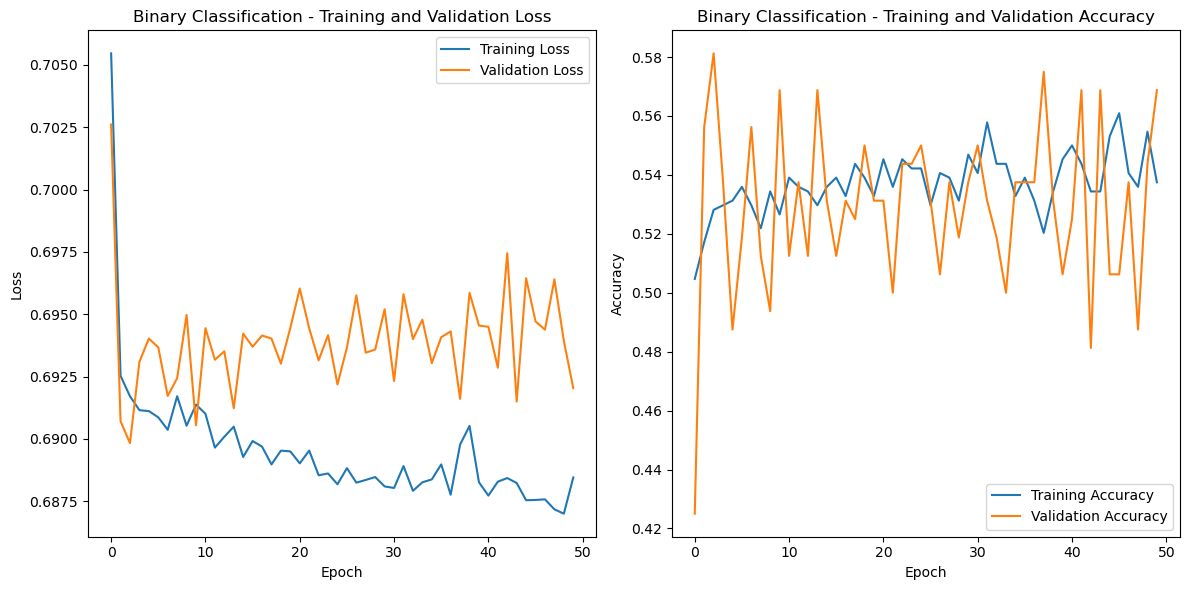

Epoch 1/50
20/20 [==============================] - 7s 73ms/step - loss: 1.4006 - accuracy: 0.2297 - val_loss: 1.3804 - val_accuracy: 0.2750
Epoch 2/50
20/20 [==============================] - 0s 18ms/step - loss: 1.3851 - accuracy: 0.2766 - val_loss: 1.3741 - val_accuracy: 0.2438
Epoch 3/50
20/20 [==============================] - 0s 21ms/step - loss: 1.3817 - accuracy: 0.2969 - val_loss: 1.3716 - val_accuracy: 0.2688
Epoch 4/50
20/20 [==============================] - 0s 26ms/step - loss: 1.3794 - accuracy: 0.3078 - val_loss: 1.3718 - val_accuracy: 0.2688
Epoch 5/50
20/20 [==============================] - 0s 23ms/step - loss: 1.3782 - accuracy: 0.3000 - val_loss: 1.3754 - val_accuracy: 0.2688
Epoch 6/50
20/20 [==============================] - 0s 21ms/step - loss: 1.3768 - accuracy: 0.3094 - val_loss: 1.3721 - val_accuracy: 0.2750
Epoch 7/50
20/20 [==============================] - 0s 23ms/step - loss: 1.3758 - accuracy: 0.3094 - val_loss: 1.3749 - val_accuracy: 0.2625
Epoch 8/50
20

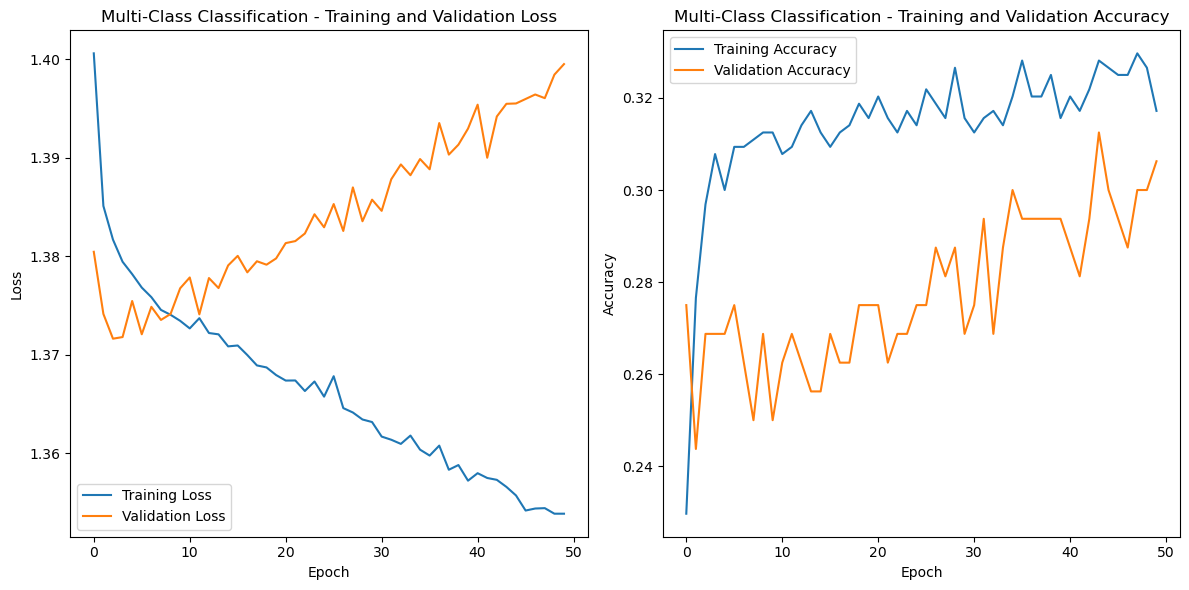

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

np.random.seed(42)
num_samples = 1000
grades1 = np.random.uniform(60, 100, num_samples)
grades2 = np.random.uniform(60, 100, num_samples)
class_labels1 = np.random.choice([0, 1], num_samples)
data1 = pd.DataFrame({
    'Grade1': grades1,
    'Grade2': grades2,
    'PassFail': class_labels1
})
print(data1.head())
data1.to_csv('PR7BinaryData.csv', index=False)

class_labels2 = np.random.choice([0, 1, 2, 3], num_samples)
class_mapping = {
    0: 'Fail',
    1: 'Low',
    2: 'Medium',
    3: 'High'
}
class_labels_str = [class_mapping[label] for label in class_labels2]
data2 = pd.DataFrame({
    'Grade1': grades1,
    'Grade2': grades2,
    'ClassLabel': class_labels_str
})
print(data2.head())
data2.to_csv('PR7MulticlassData.csv', index=False)

#Binary
X_binary = data1.drop('PassFail', axis=1)
y_binary = data1['PassFail']
scaler_binary = StandardScaler()
X_binary = scaler_binary.fit_transform(X_binary)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model_binary = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_binary.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=50, batch_size=32, validation_split=0.2)
y_pred_binary_probabilities = model_binary.predict(X_test_binary)
y_pred_binary = np.round(y_pred_binary_probabilities).flatten()
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'\nBinary Classification - Accuracy on the test set: {accuracy_binary:.2f}')

training_loss = history_binary.history['loss']
training_accuracy = history_binary.history['accuracy']
validation_loss = history_binary.history['val_loss']
validation_accuracy = history_binary.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Binary Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#Multiclassification
X_multi = data2.drop('ClassLabel', axis=1)
y_multi = data2['ClassLabel']
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)
scaler_multi = StandardScaler()
X_multi = scaler_multi.fit_transform(X_multi)

X_train_multi, X_test_multi, y_train_multi_encoded, y_test_multi_encoded = train_test_split(
    X_multi, tf.keras.utils.to_categorical(y_multi_encoded, num_classes=len(label_encoder.classes_)),
    test_size=0.2, random_state=42
)

model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_multi.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(X_train_multi, y_train_multi_encoded, epochs=50, batch_size=32, validation_split=0.2)
y_pred_multi = np.argmax(model_multi.predict(X_test_multi), axis=-1)
accuracy_multi = accuracy_score(np.argmax(y_test_multi_encoded, axis=-1), y_pred_multi)

print(f'\nMulti-Class Classification - Accuracy on the test set: {accuracy_multi:.2f}')

training_loss_multi = history_multi.history['loss']
training_accuracy_multi = history_multi.history['accuracy']
validation_loss_multi = history_multi.history['val_loss']
validation_accuracy_multi = history_multi.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss_multi, label='Training Loss')
plt.plot(validation_loss_multi, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multi-Class Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy_multi, label='Training Accuracy')
plt.plot(validation_accuracy_multi, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multi-Class Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/50
20/20 [==============================] - 5s 62ms/step - loss: 0.6960 - accuracy: 0.4641 - val_loss: 0.6954 - val_accuracy: 0.5250
Epoch 2/50
20/20 [==============================] - 0s 16ms/step - loss: 0.6916 - accuracy: 0.5281 - val_loss: 0.6925 - val_accuracy: 0.5875
Epoch 3/50
20/20 [==============================] - 0s 16ms/step - loss: 0.6917 - accuracy: 0.5125 - val_loss: 0.6972 - val_accuracy: 0.4938
Epoch 4/50
20/20 [==============================] - 0s 18ms/step - loss: 0.6905 - accuracy: 0.5203 - val_loss: 0.6951 - val_accuracy: 0.5188
Epoch 5/50
20/20 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.5156 - val_loss: 0.6906 - val_accuracy: 0.5875
Epoch 6/50
20/20 [==============================] - 0s 17ms/step - loss: 0.6901 - accuracy: 0.5312 - val_loss: 0.6926 - val_accuracy: 0.5437
Epoch 7/50
20/20 [==============================] - 0s 19ms/step - loss: 0.6901 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.5688
Epoch 8/50
20

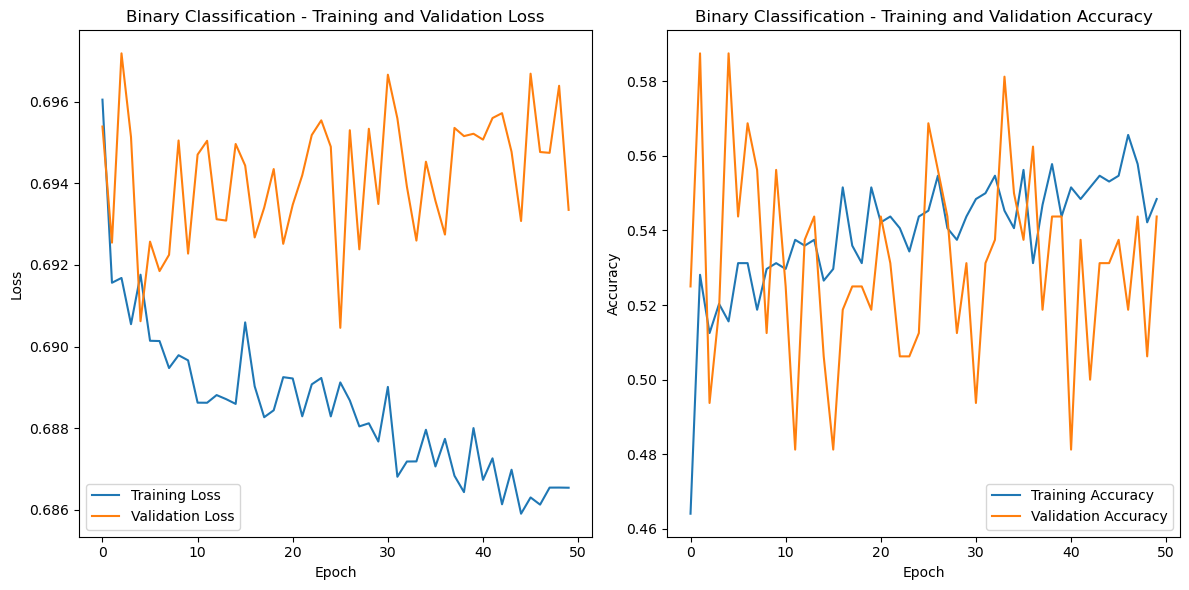

Epoch 1/50
20/20 [==============================] - 5s 53ms/step - loss: 1.3900 - accuracy: 0.2469 - val_loss: 1.3840 - val_accuracy: 0.2500
Epoch 2/50
20/20 [==============================] - 0s 18ms/step - loss: 1.3822 - accuracy: 0.2719 - val_loss: 1.3838 - val_accuracy: 0.2438
Epoch 3/50
20/20 [==============================] - 0s 20ms/step - loss: 1.3801 - accuracy: 0.2703 - val_loss: 1.3815 - val_accuracy: 0.3063
Epoch 4/50
20/20 [==============================] - 0s 17ms/step - loss: 1.3782 - accuracy: 0.2953 - val_loss: 1.3814 - val_accuracy: 0.2812
Epoch 5/50
20/20 [==============================] - 0s 19ms/step - loss: 1.3764 - accuracy: 0.2953 - val_loss: 1.3811 - val_accuracy: 0.2625
Epoch 6/50
20/20 [==============================] - 0s 18ms/step - loss: 1.3750 - accuracy: 0.3063 - val_loss: 1.3805 - val_accuracy: 0.2688
Epoch 7/50
20/20 [==============================] - 0s 17ms/step - loss: 1.3741 - accuracy: 0.3109 - val_loss: 1.3815 - val_accuracy: 0.2812
Epoch 8/50
20

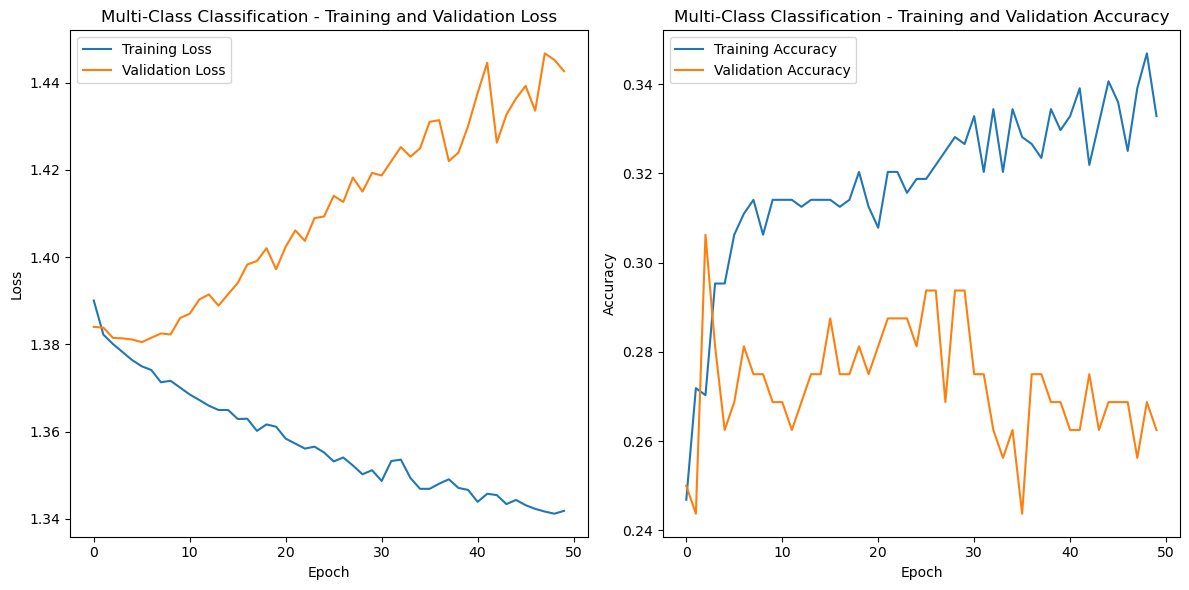

In [17]:
#Binary
X_binary = data1.drop('PassFail', axis=1)
y_binary = data1['PassFail']
scaler_binary = StandardScaler()
X_binary = scaler_binary.fit_transform(X_binary)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model_binary = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_binary.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=50, batch_size=32, validation_split=0.2)
y_pred_binary_probabilities = model_binary.predict(X_test_binary)
y_pred_binary = np.round(y_pred_binary_probabilities).flatten()
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'\nBinary Classification - Accuracy on the test set: {accuracy_binary:.2f}')

training_loss = history_binary.history['loss']
training_accuracy = history_binary.history['accuracy']
validation_loss = history_binary.history['val_loss']
validation_accuracy = history_binary.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Binary Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#Multiclassification
X_multi = data2.drop('ClassLabel', axis=1)
y_multi = data2['ClassLabel']
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)
scaler_multi = StandardScaler()
X_multi = scaler_multi.fit_transform(X_multi)

X_train_multi, X_test_multi, y_train_multi_encoded, y_test_multi_encoded = train_test_split(
    X_multi, tf.keras.utils.to_categorical(y_multi_encoded, num_classes=len(label_encoder.classes_)),
    test_size=0.2, random_state=42
)

model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_multi.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(X_train_multi, y_train_multi_encoded, epochs=50, batch_size=32, validation_split=0.2)
y_pred_multi = np.argmax(model_multi.predict(X_test_multi), axis=-1)
accuracy_multi = accuracy_score(np.argmax(y_test_multi_encoded, axis=-1), y_pred_multi)

print(f'\nMulti-Class Classification - Accuracy on the test set: {accuracy_multi:.2f}')

training_loss_multi = history_multi.history['loss']
training_accuracy_multi = history_multi.history['accuracy']
validation_loss_multi = history_multi.history['val_loss']
validation_accuracy_multi = history_multi.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss_multi, label='Training Loss')
plt.plot(validation_loss_multi, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multi-Class Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy_multi, label='Training Accuracy')
plt.plot(validation_accuracy_multi, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multi-Class Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/50
20/20 [==============================] - 11s 102ms/step - loss: 0.6975 - accuracy: 0.4984 - val_loss: 0.6846 - val_accuracy: 0.5625 - lr: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 1s 37ms/step - loss: 8.5379 - accuracy: 0.4953 - val_loss: 0.8725 - val_accuracy: 0.4375 - lr: 0.9048
Epoch 3/50
20/20 [==============================] - 0s 23ms/step - loss: 1.1523 - accuracy: 0.5000 - val_loss: 1.0483 - val_accuracy: 0.4375 - lr: 1.8097
Epoch 4/50
20/20 [==============================] - 0s 19ms/step - loss: 2.3039 - accuracy: 0.5141 - val_loss: 0.6883 - val_accuracy: 0.5625 - lr: 2.7145
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: 0.7553 - accuracy: 0.4891 - val_loss: 0.8649 - val_accuracy: 0.4375 - lr: 3.6193
Epoch 6/50
20/20 [==============================] - 0s 18ms/step - loss: 0.8320 - accuracy: 0.5172 - val_loss: 0.8356 - val_accuracy: 0.5625 - lr: 4.5242
Epoch 7/50
20/20 [==============================] - 0s 19ms/step - los

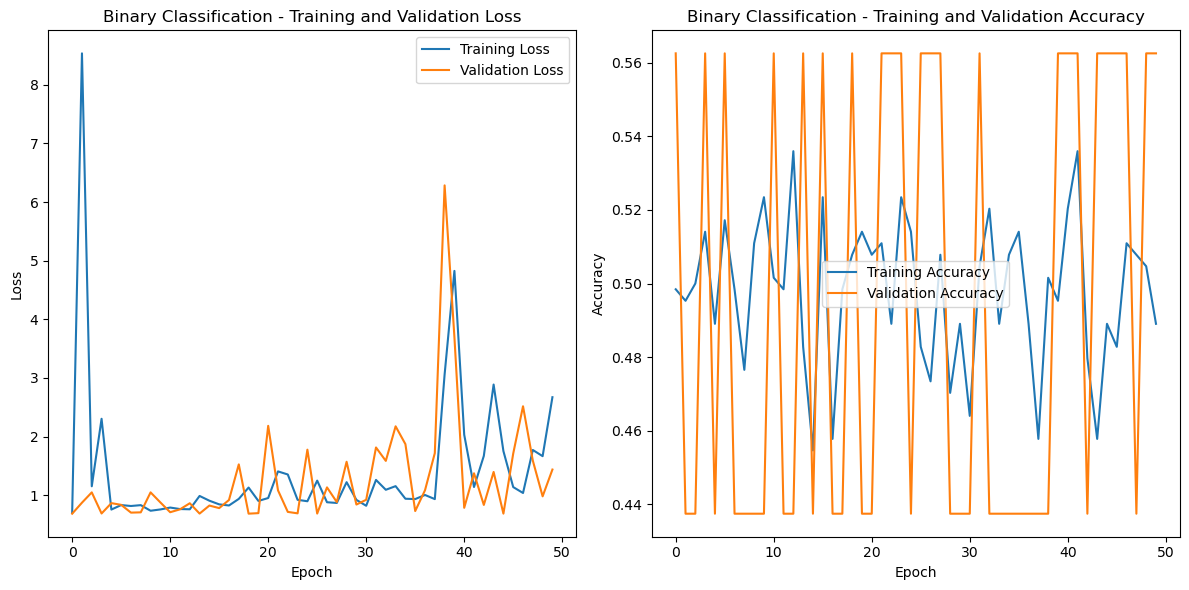

Epoch 1/50
20/20 [==============================] - 6s 57ms/step - loss: 1.3914 - accuracy: 0.2484 - val_loss: 1.3832 - val_accuracy: 0.2688 - lr: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 0s 20ms/step - loss: 7.1620 - accuracy: 0.2406 - val_loss: 1.4593 - val_accuracy: 0.2812 - lr: 0.9048
Epoch 3/50
20/20 [==============================] - 0s 22ms/step - loss: 1.4409 - accuracy: 0.2578 - val_loss: 1.4601 - val_accuracy: 0.2812 - lr: 1.8097
Epoch 4/50
20/20 [==============================] - 1s 29ms/step - loss: 1.4830 - accuracy: 0.2703 - val_loss: 1.6718 - val_accuracy: 0.2750 - lr: 2.7145
Epoch 5/50
20/20 [==============================] - 0s 20ms/step - loss: 1.4791 - accuracy: 0.2609 - val_loss: 1.4227 - val_accuracy: 0.2125 - lr: 3.6193
Epoch 6/50
20/20 [==============================] - 0s 18ms/step - loss: 1.5076 - accuracy: 0.2547 - val_loss: 1.7849 - val_accuracy: 0.2750 - lr: 4.5242
Epoch 7/50
20/20 [==============================] - 0s 20ms/step - loss:

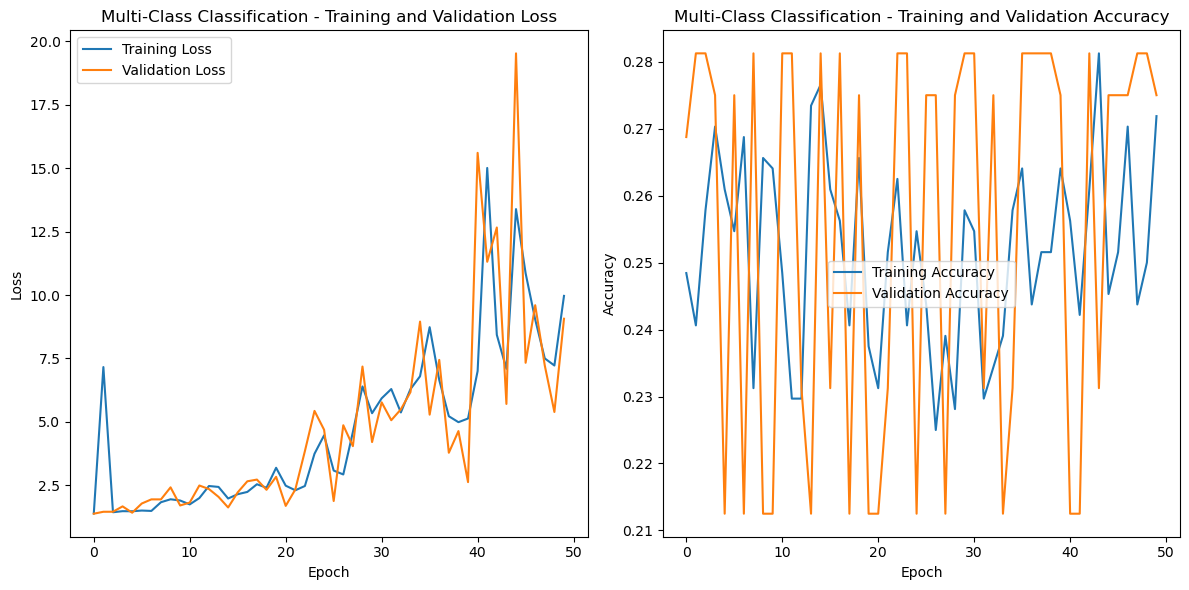

In [18]:
#Binary
X_binary = data1.drop('PassFail', axis=1)
y_binary = data1['PassFail']
scaler_binary = StandardScaler()
X_binary = scaler_binary.fit_transform(X_binary)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model_binary = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_binary.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lambda lr: lr * tf.math.exp(-0.1))
# Callbacks в Keras — це функції, які можна застосовувати на різних етапах процесу навчання, наприклад на початку 
#або в кінці епохи. Callback LearningRateScheduler дозволяє запланувати зміну швидкості навчання під час навчання.
model_binary.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler_callback])
y_pred_binary_probabilities = model_binary.predict(X_test_binary)
y_pred_binary = np.round(y_pred_binary_probabilities).flatten()
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'\nBinary Classification - Accuracy on the test set: {accuracy_binary:.2f}')

training_loss = history_binary.history['loss']
training_accuracy = history_binary.history['accuracy']
validation_loss = history_binary.history['val_loss']
validation_accuracy = history_binary.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Binary Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#Multiclassification
X_multi = data2.drop('ClassLabel', axis=1)
y_multi = data2['ClassLabel']
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)
scaler_multi = StandardScaler()
X_multi = scaler_multi.fit_transform(X_multi)

X_train_multi, X_test_multi, y_train_multi_encoded, y_test_multi_encoded = train_test_split(
    X_multi, tf.keras.utils.to_categorical(y_multi_encoded, num_classes=len(label_encoder.classes_)),
    test_size=0.2, random_state=42
)

model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_multi.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lambda lr: lr * tf.math.exp(-0.1))
model_multi.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(X_train_multi, y_train_multi_encoded, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler_callback])
y_pred_multi = np.argmax(model_multi.predict(X_test_multi), axis=-1)
accuracy_multi = accuracy_score(np.argmax(y_test_multi_encoded, axis=-1), y_pred_multi)

print(f'\nMulti-Class Classification - Accuracy on the test set: {accuracy_multi:.2f}')

training_loss_multi = history_multi.history['loss']
training_accuracy_multi = history_multi.history['accuracy']
validation_loss_multi = history_multi.history['val_loss']
validation_accuracy_multi = history_multi.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss_multi, label='Training Loss')
plt.plot(validation_loss_multi, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multi-Class Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy_multi, label='Training Accuracy')
plt.plot(validation_accuracy_multi, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multi-Class Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/300
20/20 [==============================] - 6s 53ms/step - loss: 0.6927 - accuracy: 0.5094 - val_loss: 0.6907 - val_accuracy: 0.5500 - lr: 0.0000e+00
Epoch 2/300
20/20 [==============================] - 0s 18ms/step - loss: 5.6504 - accuracy: 0.4797 - val_loss: 0.6937 - val_accuracy: 0.4375 - lr: 0.9048
Epoch 3/300
20/20 [==============================] - 0s 18ms/step - loss: 0.7212 - accuracy: 0.4984 - val_loss: 0.7428 - val_accuracy: 0.4375 - lr: 1.8097
Epoch 4/300
20/20 [==============================] - 0s 19ms/step - loss: 0.7110 - accuracy: 0.4953 - val_loss: 0.6977 - val_accuracy: 0.4375 - lr: 2.7145
Epoch 5/300
20/20 [==============================] - 0s 23ms/step - loss: 0.7370 - accuracy: 0.5078 - val_loss: 0.6936 - val_accuracy: 0.5625 - lr: 3.6193
Epoch 6/300
20/20 [==============================] - 0s 18ms/step - loss: 0.7974 - accuracy: 0.4859 - val_loss: 0.8538 - val_accuracy: 0.4375 - lr: 4.5242
Epoch 7/300
20/20 [==============================] - 0s 19ms/step 

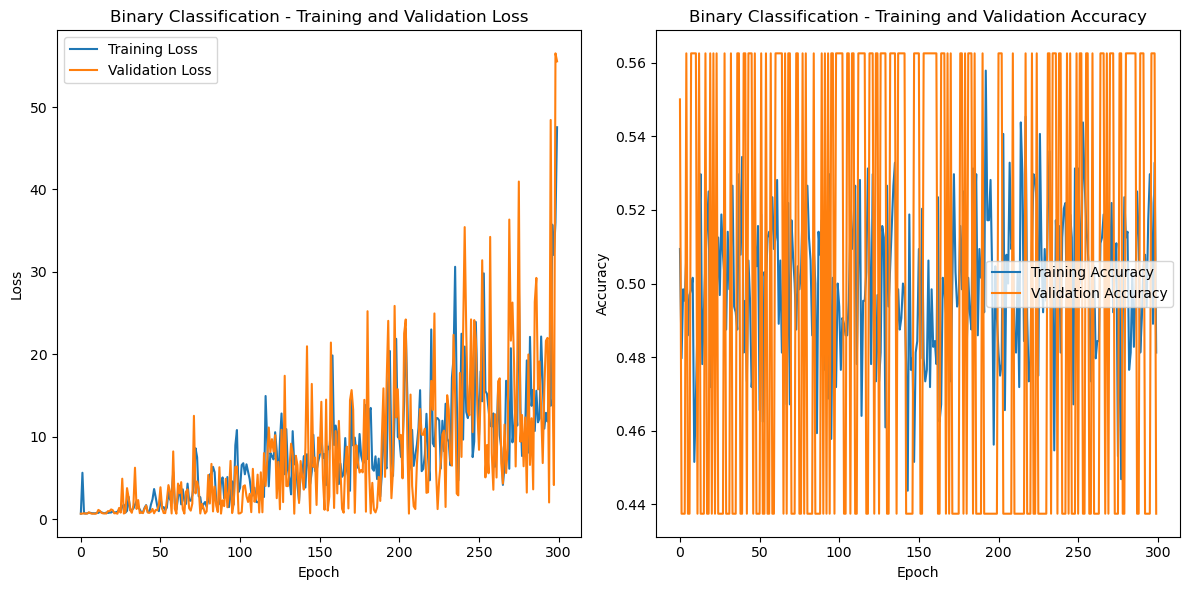

Epoch 1/300
20/20 [==============================] - 6s 54ms/step - loss: 1.3892 - accuracy: 0.2359 - val_loss: 1.3895 - val_accuracy: 0.2750 - lr: 0.0000e+00
Epoch 2/300
20/20 [==============================] - 0s 19ms/step - loss: 6.4109 - accuracy: 0.2359 - val_loss: 1.4422 - val_accuracy: 0.2812 - lr: 0.9048
Epoch 3/300
20/20 [==============================] - 0s 19ms/step - loss: 98.3194 - accuracy: 0.2594 - val_loss: 1.5514 - val_accuracy: 0.2125 - lr: 1.8097
Epoch 4/300
20/20 [==============================] - 0s 20ms/step - loss: 58.2000 - accuracy: 0.2484 - val_loss: 1.4750 - val_accuracy: 0.2750 - lr: 2.7145
Epoch 5/300
20/20 [==============================] - 0s 18ms/step - loss: 1.5227 - accuracy: 0.2641 - val_loss: 1.5668 - val_accuracy: 0.2750 - lr: 3.6193
Epoch 6/300
20/20 [==============================] - 0s 18ms/step - loss: 1.7278 - accuracy: 0.2500 - val_loss: 1.6394 - val_accuracy: 0.2750 - lr: 4.5242
Epoch 7/300
20/20 [==============================] - 0s 21ms/ste

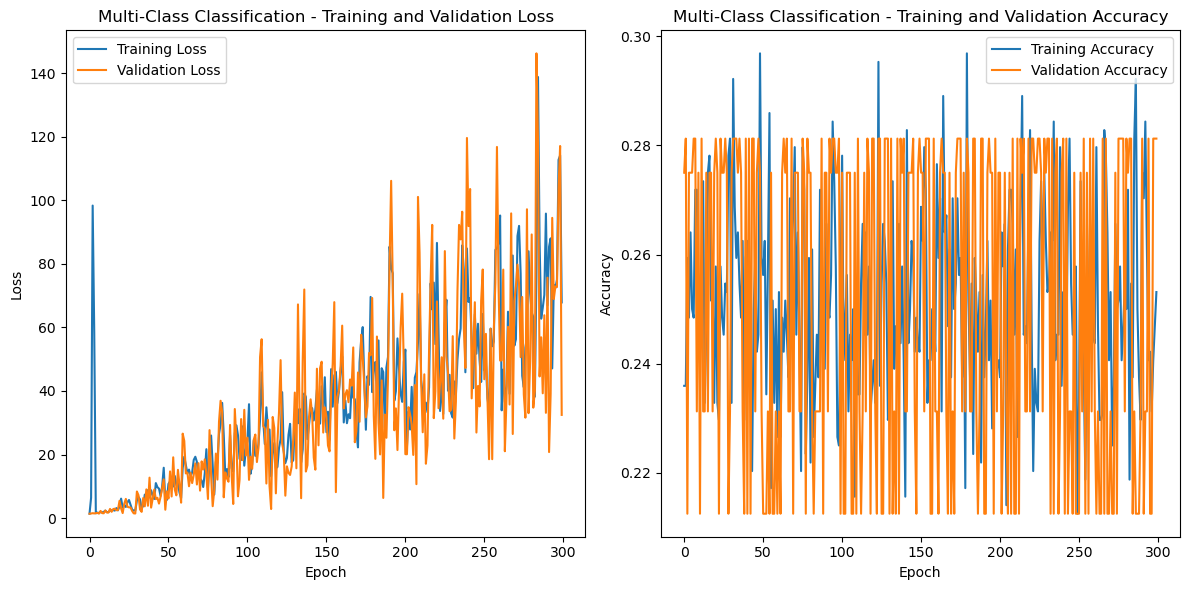

In [19]:
#Binary
X_binary = data1.drop('PassFail', axis=1)
y_binary = data1['PassFail']
scaler_binary = StandardScaler()
X_binary = scaler_binary.fit_transform(X_binary)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model_binary = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_binary.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lambda lr: lr * tf.math.exp(-0.1))
model_binary.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=300, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler_callback])
y_pred_binary_probabilities = model_binary.predict(X_test_binary)
y_pred_binary = np.round(y_pred_binary_probabilities).flatten()
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f'\nBinary Classification - Accuracy on the test set: {accuracy_binary:.2f}')

training_loss = history_binary.history['loss']
training_accuracy = history_binary.history['accuracy']
validation_loss = history_binary.history['val_loss']
validation_accuracy = history_binary.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Binary Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#Multiclassification
X_multi = data2.drop('ClassLabel', axis=1)
y_multi = data2['ClassLabel']
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)
scaler_multi = StandardScaler()
X_multi = scaler_multi.fit_transform(X_multi)

X_train_multi, X_test_multi, y_train_multi_encoded, y_test_multi_encoded = train_test_split(
    X_multi, tf.keras.utils.to_categorical(y_multi_encoded, num_classes=len(label_encoder.classes_)),
    test_size=0.2, random_state=42
)

model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_multi.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lambda lr: lr * tf.math.exp(-0.1))
model_multi.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history_multi = model_multi.fit(X_train_multi, y_train_multi_encoded, epochs=300, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler_callback])
y_pred_multi = np.argmax(model_multi.predict(X_test_multi), axis=-1)
accuracy_multi = accuracy_score(np.argmax(y_test_multi_encoded, axis=-1), y_pred_multi)

print(f'\nMulti-Class Classification - Accuracy on the test set: {accuracy_multi:.2f}')

training_loss_multi = history_multi.history['loss']
training_accuracy_multi = history_multi.history['accuracy']
validation_loss_multi = history_multi.history['val_loss']
validation_accuracy_multi = history_multi.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss_multi, label='Training Loss')
plt.plot(validation_loss_multi, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multi-Class Classification - Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy_multi, label='Training Accuracy')
plt.plot(validation_accuracy_multi, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multi-Class Classification - Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()